<a href="https://colab.research.google.com/github/dgx781/Deep-learning/blob/DataScience-Ocean/Fashion_MNIST_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
import tensorflow as tf
from tensorflow import keras

In [49]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
y_train.shape

(60000,)

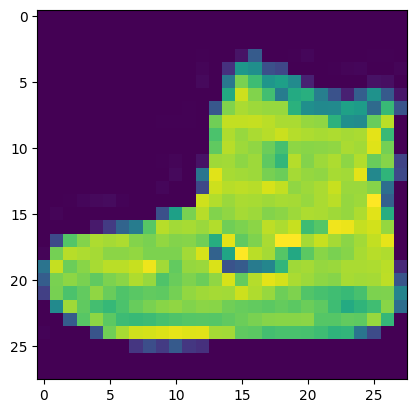

In [52]:
plt.imshow(x_train[0])

In [53]:
x_train[0].shape

(28, 28)

In [55]:
x_train= x_train.reshape(len(x_train),28,28,1)
x_test= x_test.reshape(len(x_test),28,28,1)

In [56]:
x_train.shape

(60000, 28, 28, 1)

In [57]:
model= keras.Sequential([
    keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu', input_shape= (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation='relu', input_shape= (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [58]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [59]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.5530 - accuracy: 0.8326
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3286 - accuracy: 0.8781
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2934 - accuracy: 0.8917
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2658 - accuracy: 0.8996
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2505 - accuracy: 0.9062
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2321 - accuracy: 0.9116
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2151 - accuracy: 0.9184
Epoch 8/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1999 - accuracy: 0.9248
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1893 - accuracy: 0.9282
Epoch 10/10
1875/1875 [==============================] - 60s 32m

In [60]:
y_pred= model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[3.53003747e-19, 6.91663334e-23, 4.35569965e-22, 6.93257978e-14,
        2.03854075e-23, 4.00229364e-11, 4.72668000e-14, 2.44936516e-10,
        8.05944597e-16, 9.99999940e-01],
       [4.02576220e-13, 4.03548777e-24, 9.99997795e-01, 6.78985947e-14,
        6.28423447e-09, 7.31871555e-29, 2.17947854e-06, 1.66367275e-29,
        8.23640608e-15, 4.49209583e-33],
       [1.25828889e-20, 9.99999940e-01, 9.45588585e-26, 3.14847428e-25,
        7.01618160e-30, 2.66299566e-27, 1.01064784e-26, 4.40808219e-31,
        1.53469043e-24, 3.29561267e-31],
       [4.17659001e-18, 9.99999940e-01, 1.22652174e-21, 1.09307071e-19,
        3.31054472e-23, 2.46716695e-26, 6.09329574e-24, 1.01657146e-26,
        1.34427375e-20, 1.67335182e-28],
       [5.32089889e-01, 4.76089226e-05, 9.57474113e-02, 9.61855147e-03,
        5.32504357e-02, 1.91861211e-08, 3.09245378e-01, 4.25772667e-10,
        6.82848793e-07, 9.44543610e-11]], dtype=float32)

In [62]:
np.argmax(y_pred[0])

9

In [63]:
y_pred_labels= [np.argmax(element) for element in y_pred]
y_pred_labels[:5]

[9, 2, 1, 1, 0]

In [64]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

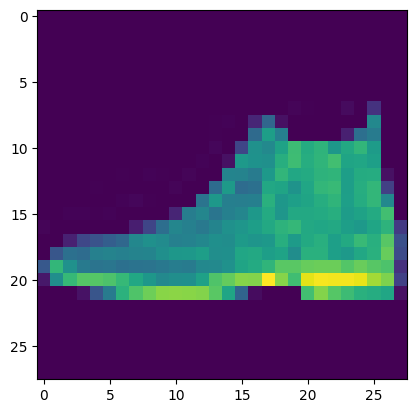

In [65]:
plt.imshow(x_test[0])

In [71]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [72]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred_labels))
print((mean_squared_error(y_test, y_pred_labels)**0.5))

0.8198909090909091
1.2189749792346027


In [73]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.3754 - accuracy: 0.8939


[0.37535348534584045, 0.8938999772071838]

In [82]:
from sklearn.metrics import classification_report
history= classification_report(y_test, y_pred_labels, output_dict=True)

In [79]:
print(history)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.85      0.83      1000
           3       0.90      0.91      0.90      1000
           4       0.86      0.78      0.81      1000
           5       0.97      0.98      0.98      1000
           6       0.69      0.72      0.70      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [85]:
his= pd.DataFrame(history)
his

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.848089,0.987805,0.804143,0.898020,0.857459,0.970297,0.687023,0.958628,0.981855,0.959163,0.8939,0.895248,0.895248
recall,0.843000,0.972000,0.854000,0.907000,0.776000,0.980000,0.720000,0.950000,0.974000,0.963000,0.8939,0.893900,0.893900
f1-score,0.845537,0.979839,0.828322,0.902488,0.814698,0.975124,0.703125,0.954294,0.977912,0.961078,0.8939,0.894242,0.894242
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8939,10000.000000,10000.000000


In [90]:
history= his.T
history

,precision,recall,f1-score,support
0,0.848089,0.8430,0.845537,1000.0000
1,0.987805,0.9720,0.979839,1000.0000
2,0.804143,0.8540,0.828322,1000.0000
3,0.898020,0.9070,0.902488,1000.0000
4,0.857459,0.7760,0.814698,1000.0000
5,0.970297,0.9800,0.975124,1000.0000
6,0.687023,0.7200,0.703125,1000.0000
7,0.958628,0.9500,0.954294,1000.0000
8,0.981855,0.9740,0.977912,1000.0000
9,0.959163,0.9630,0.961078,1000.0000


In [91]:
plt.style.use('dark_background')

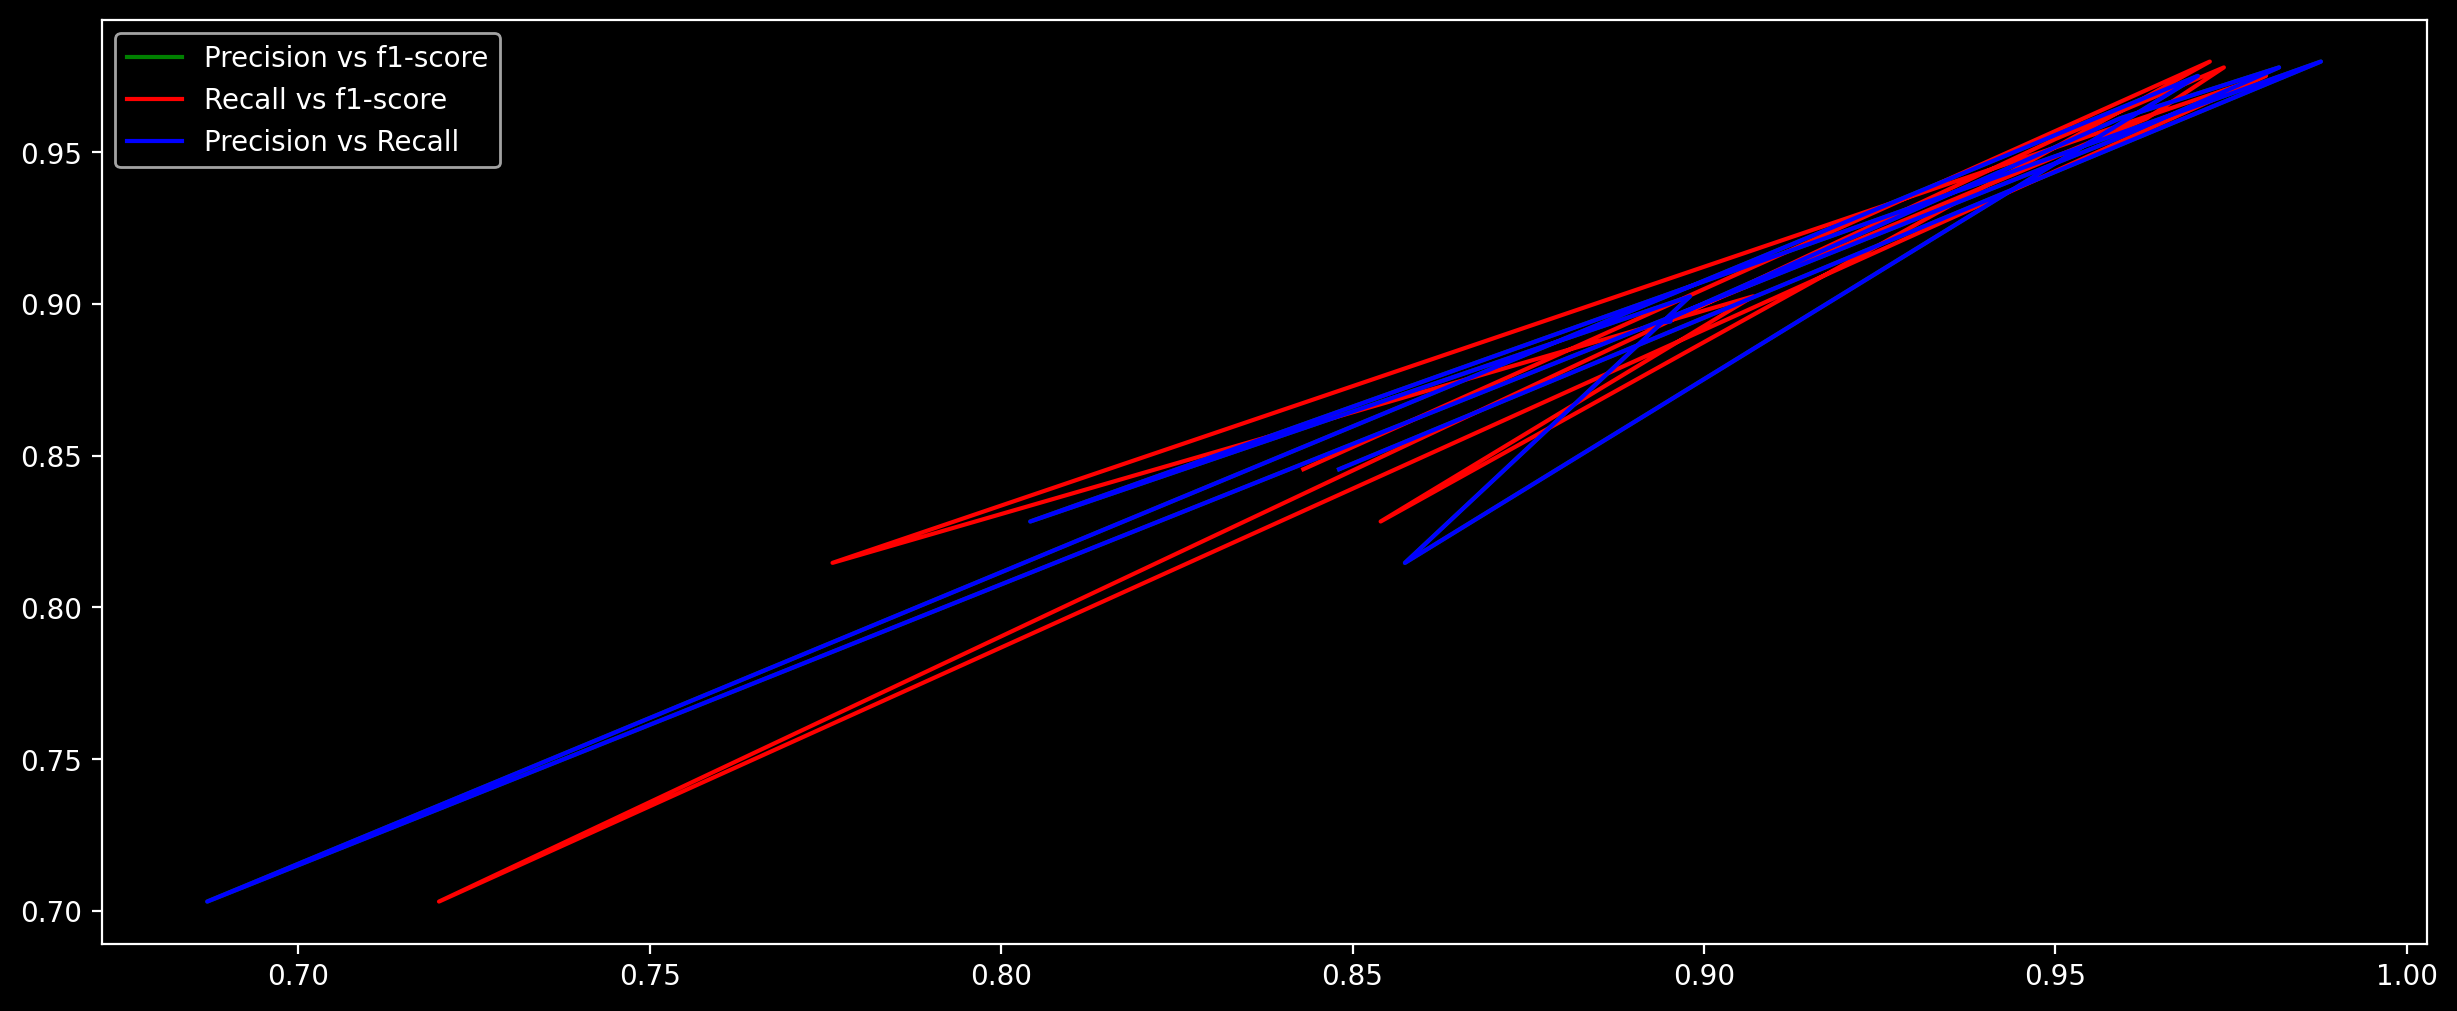

In [96]:
plt.figure(figsize= (15,6), dpi=200)
plt.plot(history['precision'], history['f1-score'], color='green', label='Precision vs f1-score')
plt.plot(history['recall'], history['f1-score'], color='red', label='Recall vs f1-score')
plt.plot(history['precision'], history['f1-score'], color='blue', label='Precision vs Recall')
plt.legend()